<a href="https://colab.research.google.com/github/eliranda/test10/blob/main/YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.4/910.4 kB 12.0 MB/s eta 0:00:00



0: 480x640 1 person, 5 traffic lights, 515.2ms
Speed: 3.8ms preprocess, 515.2ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


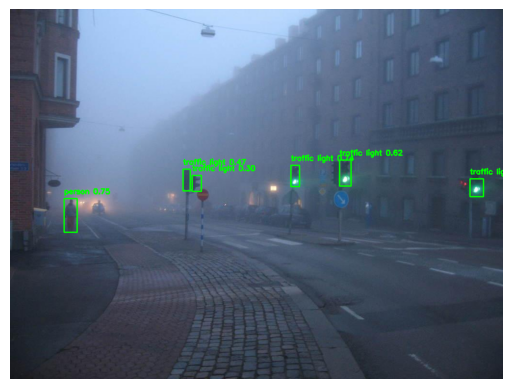

In [38]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# טעינת מודל YOLO
model = YOLO("yolov8s.pt")

# קריאה לתמונה
img_path = '/content/drive/MyDrive/פרויקט גמר יד/machielearning/1fe4ca140dedc7a5_jpg.rf.75c9002edda8262927aeda0c57704913.jpg'
img = cv2.imread(img_path)

# הרצת הזיהוי
results = model(img)

# ציור תיבות זיהוי על התמונה
for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()  # קואורדינטות התיבה כערכי numpy
        confidence = box.conf[0].item()  # רמת ביטחון
        class_id = int(box.cls[0].item())  # מזהה הקטגוריה

        # ציור התיבה
        cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
        # הוספת שם הקטגוריה ורמת הביטחון
        cv2.putText(img, f"{model.names[class_id]} {confidence:.2f}", (int(x1), int(y1) - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# הצגת התמונה עם matplotlib
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [39]:
for result in results:
    for box in result.boxes:
        class_id = int(box.cls)
        confidence = box.conf  # רמת הביטחון בזיהוי
        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
        print(f"Object: {model.names[class_id]}, Confidence: {confidence}, Box: [{x1}, {y1}, {x2}, {y2}]")


Object: person, Confidence: tensor([0.7465]), Box: [112.15022277832031, 393.49847412109375, 139.77780151367188, 463.4212951660156]
Object: traffic light, Confidence: tensor([0.7411]), Box: [583.3298950195312, 324.8931579589844, 601.7986450195312, 368.4419860839844]
Object: traffic light, Confidence: tensor([0.6194]), Box: [684.8126831054688, 313.53973388671875, 708.5372314453125, 367.34295654296875]
Object: traffic light, Confidence: tensor([0.4685]), Box: [359.1544494628906, 332.824951171875, 374.30963134765625, 377.229248046875]
Object: traffic light, Confidence: tensor([0.3719]), Box: [955.5308837890625, 352.8203125, 983.4984130859375, 389.93731689453125]
Object: traffic light, Confidence: tensor([0.3014]), Box: [378.4775390625, 345.9956970214844, 397.49700927734375, 378.66552734375]


In [41]:
import cv2
import numpy as np


# טעינת התמונה
image = cv2.imread("/content/drive/MyDrive/פרויקט גמר יד/machielearning/1fe4ca140dedc7a5_jpg.rf.75c9002edda8262927aeda0c57704913.jpg")

# קואורדינטות מהמודל (x_min, y_min, x_max, y_max)
x_min, y_min, x_max, y_max = 474.45233154296875, 36.576141357421875, 538.4130859375, 179.63082885742188
x_min, y_min, x_max, y_max = map(int, [x_min, y_min, x_max, y_max])

# חיתוך האזור מתוך התמונה
cropped_region = image[y_min:y_max, x_min:x_max]

# המרה למודל צבעים HSV
hsv_region = cv2.cvtColor(cropped_region, cv2.COLOR_BGR2HSV)

# טווחים עבור הצבע האדום ב-HSV
lower_red1 = np.array([0, 50, 50])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 50, 50])
upper_red2 = np.array([180, 255, 255])

# יצירת מסכות לזיהוי הצבע האדום
mask1 = cv2.inRange(hsv_region, lower_red1, upper_red1)
mask2 = cv2.inRange(hsv_region, lower_red2, upper_red2)
red_mask = mask1 + mask2

# חישוב אחוז הפיקסלים האדומים
red_pixels = cv2.countNonZero(red_mask)
total_pixels = cropped_region.shape[0] * cropped_region.shape[1]
red_percentage = (red_pixels / total_pixels) * 100

# בדיקת נוכחות הצבע האדום
if red_percentage > 5:  # לדוגמה, אם מעל 5% מהאזור הוא אדום
    print("הרמזור אדום")
else:
    print("הרמזור לא אדום")


הרמזור לא אדום


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [42]:
import cv2
import numpy as np

def is_red_light(image, x_min, y_min, x_max, y_max):
    """
    בודק אם אזור מסוים בתמונה מכיל צבע אדום
    """
    # חיתוך האזור מתוך התמונה
    cropped_region = image[y_min:y_max, x_min:x_max]

    # המרה למודל צבעים HSV
    hsv_region = cv2.cvtColor(cropped_region, cv2.COLOR_BGR2HSV)

    # טווחים עבור הצבע האדום ב-HSV
    lower_red1 = np.array([0, 50, 50])
    upper_red1 = np.array([10, 255, 255])
    lower_red2 = np.array([170, 50, 50])
    upper_red2 = np.array([180, 255, 255])

    # יצירת מסכות לזיהוי הצבע האדום
    mask1 = cv2.inRange(hsv_region, lower_red1, upper_red1)
    mask2 = cv2.inRange(hsv_region, lower_red2, upper_red2)
    red_mask = mask1 + mask2

    # חישוב אחוז הפיקסלים האדומים
    red_pixels = cv2.countNonZero(red_mask)
    total_pixels = cropped_region.shape[0] * cropped_region.shape[1]
    red_percentage = (red_pixels / total_pixels) * 100

    # בדיקת נוכחות הצבע האדום
    return red_percentage > 5  # לדוגמה, סף של 5%

# טעינת התמונה
image = cv2.imread("/content/drive/MyDrive/פרויקט גמר יד/machielearning/0affdf85ae6f4fa6_jpg.rf.fc42e2e0b0f63c17eae412fb22fd727a.jpg")

# מעבר על התוצאות
for result in results:
    for box in result.boxes:
        class_id = int(box.cls)
        confidence = box.conf  # רמת הביטחון בזיהוי
        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()

        # בדיקה אם האובייקט הוא "traffic light"
        if model.names[class_id] == "traffic light":
            # עיגול הקואורדינטות למספרים שלמים
            x_min, y_min, x_max, y_max = map(int, [x1, y1, x2, y2])

            # בדיקה אם הרמזור אדום
            if is_red_light(image, x_min, y_min, x_max, y_max):
                print(f"Traffic light at ({x_min}, {y_min}, {x_max}, {y_max}) is RED.")
            else:
                print(f"Traffic light at ({x_min}, {y_min}, {x_max}, {y_max}) is NOT RED.")


Traffic light at (583, 324, 601, 368) is NOT RED.
Traffic light at (684, 313, 708, 367) is NOT RED.
Traffic light at (359, 332, 374, 377) is NOT RED.
Traffic light at (955, 352, 983, 389) is NOT RED.
Traffic light at (378, 345, 397, 378) is NOT RED.


In [43]:
import cv2
import numpy as np

def is_red_light(image, x_min, y_min, x_max, y_max):
    """
    בודק אם אזור מסוים בתמונה מכיל צבע אדום
    """
    # חיתוך האזור מתוך התמונה
    cropped_region = image[y_min:y_max, x_min:x_max]

    # המרה למודל צבעים HSV
    hsv_region = cv2.cvtColor(cropped_region, cv2.COLOR_BGR2HSV)

    # טווחים עבור הצבע האדום ב-HSV
    lower_red1 = np.array([0, 50, 50])
    upper_red1 = np.array([10, 255, 255])
    lower_red2 = np.array([170, 50, 50])
    upper_red2 = np.array([180, 255, 255])

    # יצירת מסכות לזיהוי הצבע האדום
    mask1 = cv2.inRange(hsv_region, lower_red1, upper_red1)
    mask2 = cv2.inRange(hsv_region, lower_red2, upper_red2)
    red_mask = mask1 + mask2

    # חישוב אחוז הפיקסלים האדומים
    red_pixels = cv2.countNonZero(red_mask)
    total_pixels = cropped_region.shape[0] * cropped_region.shape[1]
    red_percentage = (red_pixels / total_pixels) * 100

    # בדיקת נוכחות הצבע האדום
    return red_percentage > 5  # לדוגמה, סף של 5%

# טעינת התמונה
image = cv2.imread("/content/drive/MyDrive/פרויקט גמר יד/machielearning/0affdf85ae6f4fa6_jpg.rf.fc42e2e0b0f63c17eae412fb22fd727a.jpg")

# מעבר על התוצאות
for result in results:
    for box in result.boxes:
        class_id = int(box.cls)
        confidence = box.conf  # רמת הביטחון בזיהוי
        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()

        # בדיקה אם האובייקט הוא "traffic light"
        if model.names[class_id] == "traffic light":
            # עיגול הקואורדינטות למספרים שלמים
            x_min, y_min, x_max, y_max = map(int, [x1, y1, x2, y2])

            # בדיקה אם הרמזור אדום
            if is_red_light(image, x_min, y_min, x_max, y_max):
                print(f"Traffic light at ({x_min}, {y_min}, {x_max}, {y_max}) is RED.")
            else:
                print(f"Traffic light at ({x_min}, {y_min}, {x_max}, {y_max}) is NOT RED.")


Traffic light at (583, 324, 601, 368) is NOT RED.
Traffic light at (684, 313, 708, 367) is NOT RED.
Traffic light at (359, 332, 374, 377) is NOT RED.
Traffic light at (955, 352, 983, 389) is NOT RED.
Traffic light at (378, 345, 397, 378) is NOT RED.
